In [5]:
import numpy as np

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For cleaner visuals
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
df = pd.read_csv("2019.csv")

# Display first 5 rows
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [2]:
print("Shape of dataset:", df.shape)
df.info()

Shape of dataset: (156, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [3]:
print(df.columns.tolist())

['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']


In [4]:
df.describe(include='all')

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
unique,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Finland,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,78.500000,NaN,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,NaN,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,NaN,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,NaN,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,NaN,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,NaN,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250


In [5]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [6]:
print(df.dtypes)
df.nunique()

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object


Overall rank                    156
Country or region               156
Score                           155
GDP per capita                  146
Social support                  145
Healthy life expectancy         119
Freedom to make life choices    130
Generosity                      118
Perceptions of corruption       113
dtype: int64

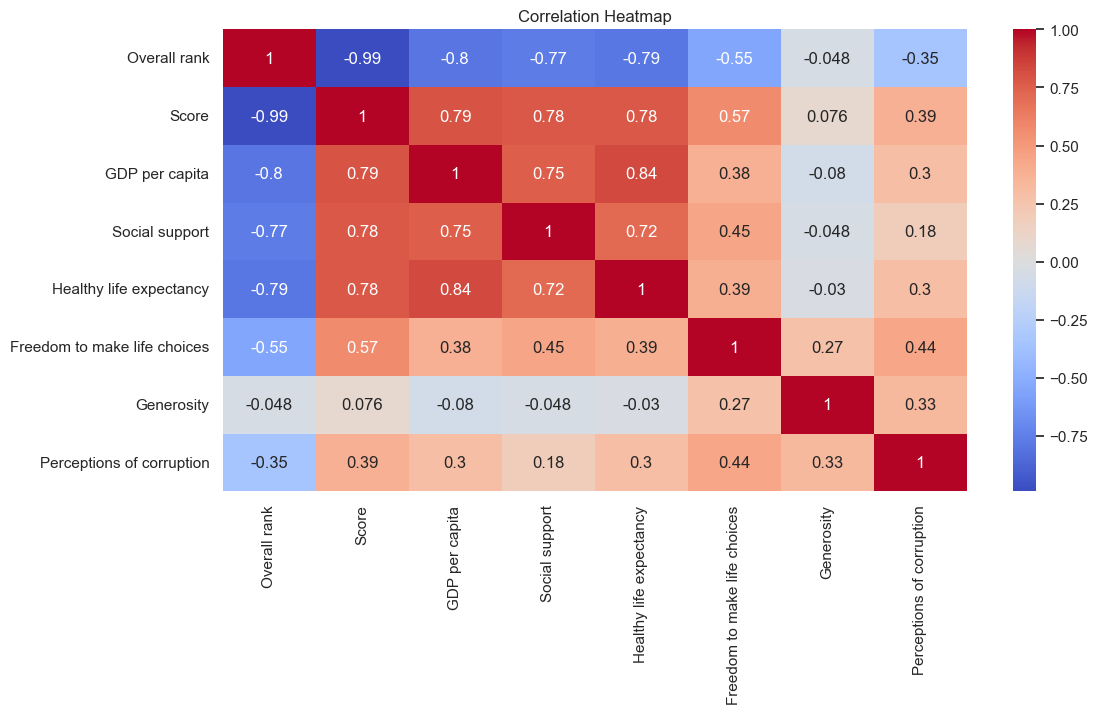

In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


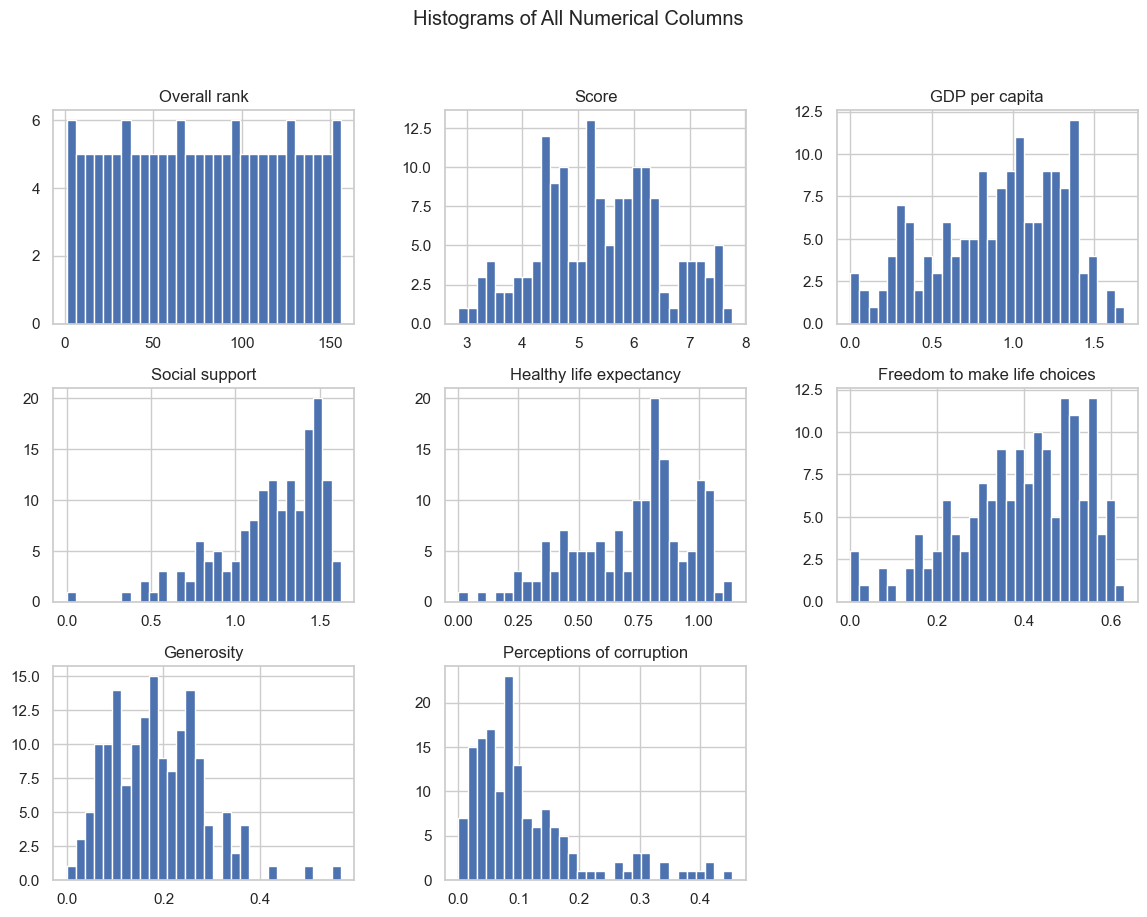

In [8]:
df.hist(bins=30, figsize=(14, 10))
plt.suptitle("Histograms of All Numerical Columns")
plt.show()

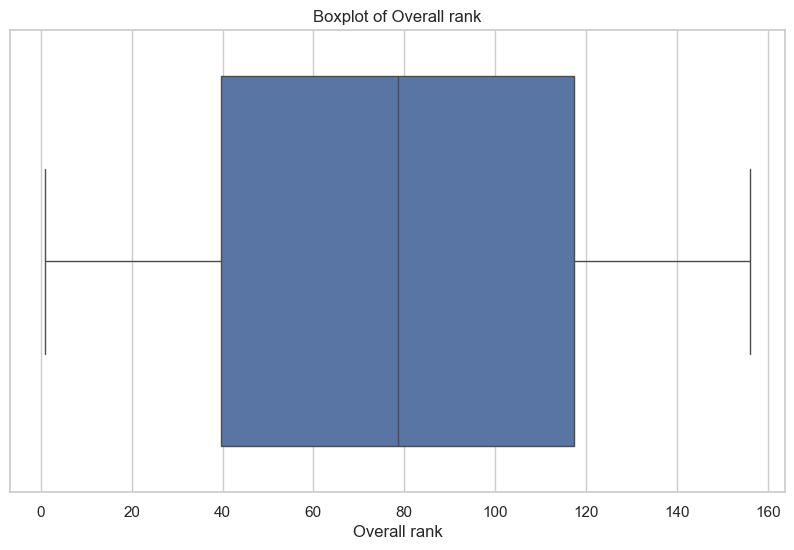

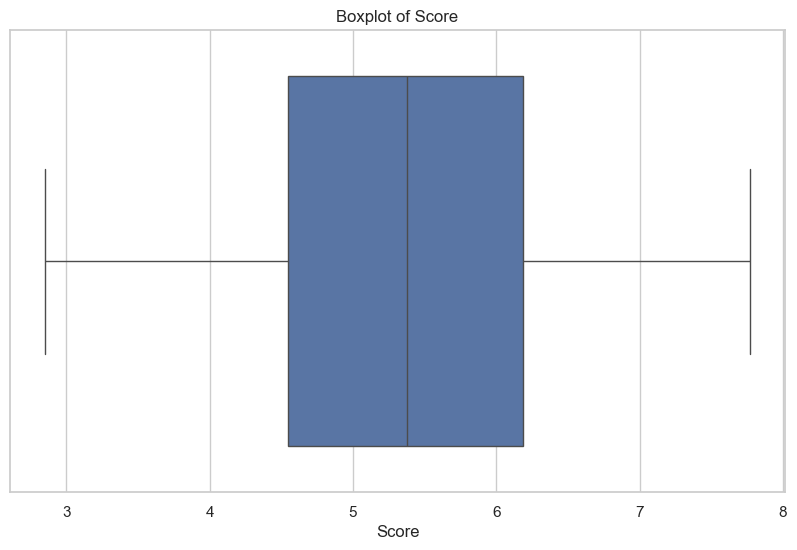

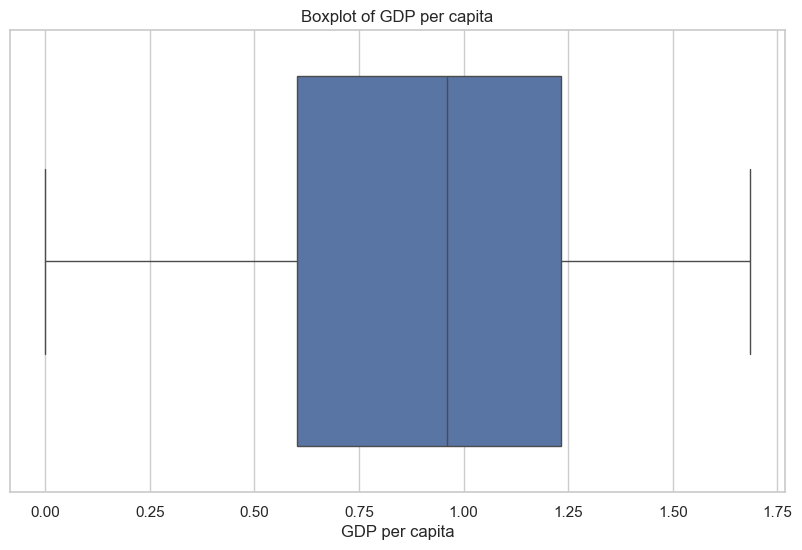

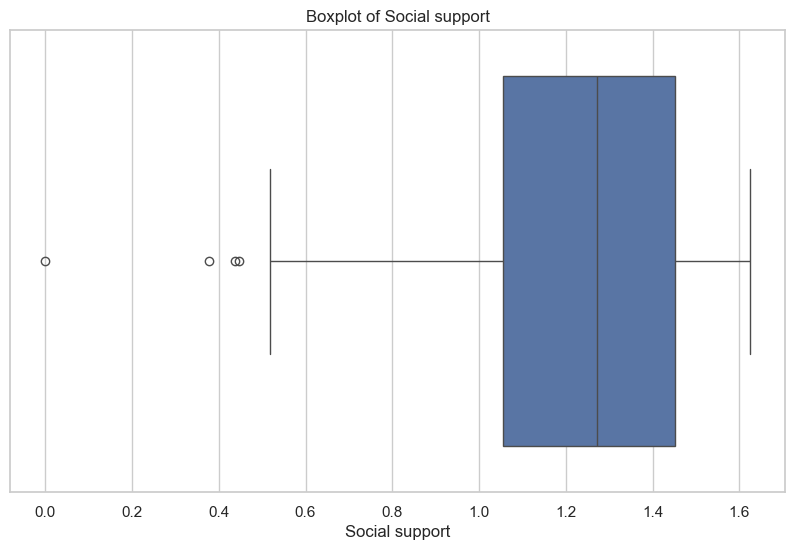

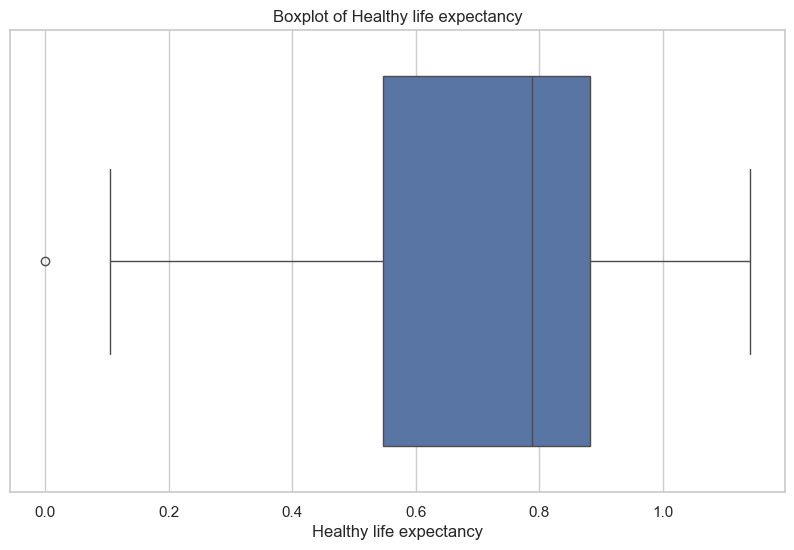

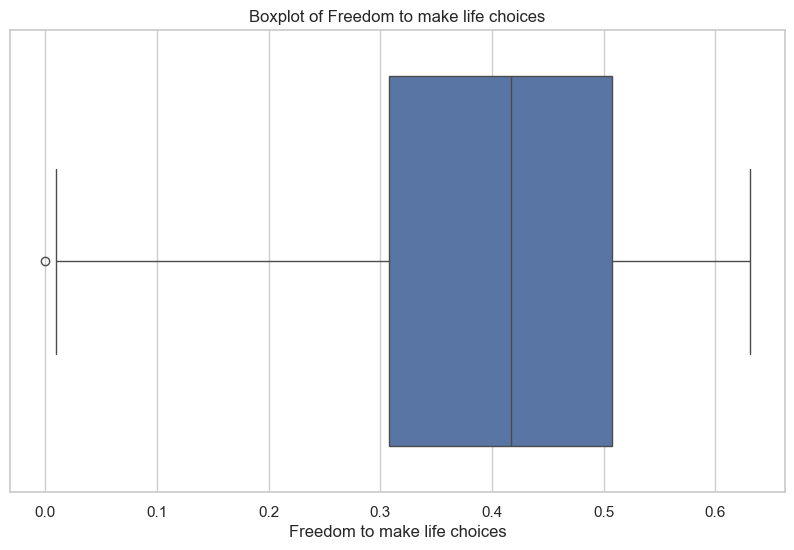

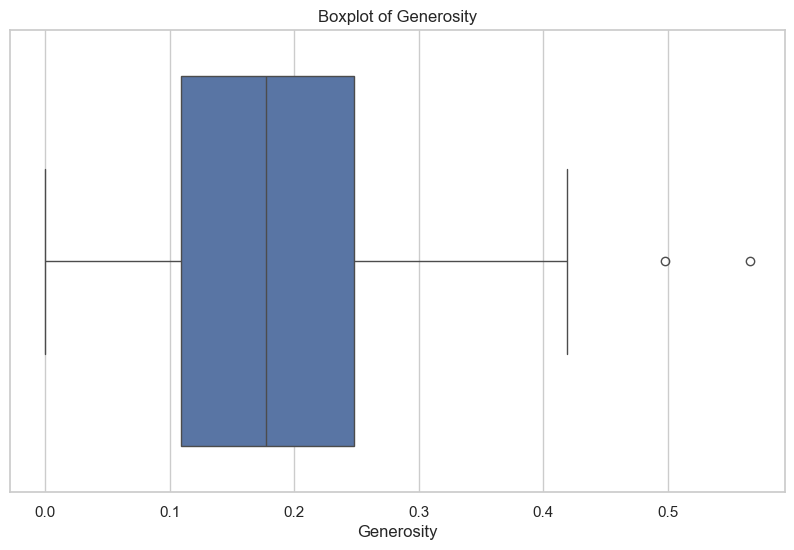

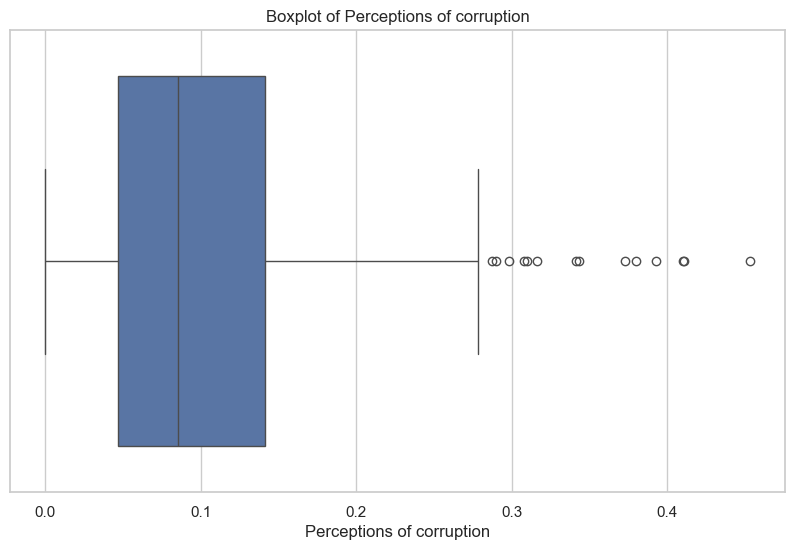

In [9]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

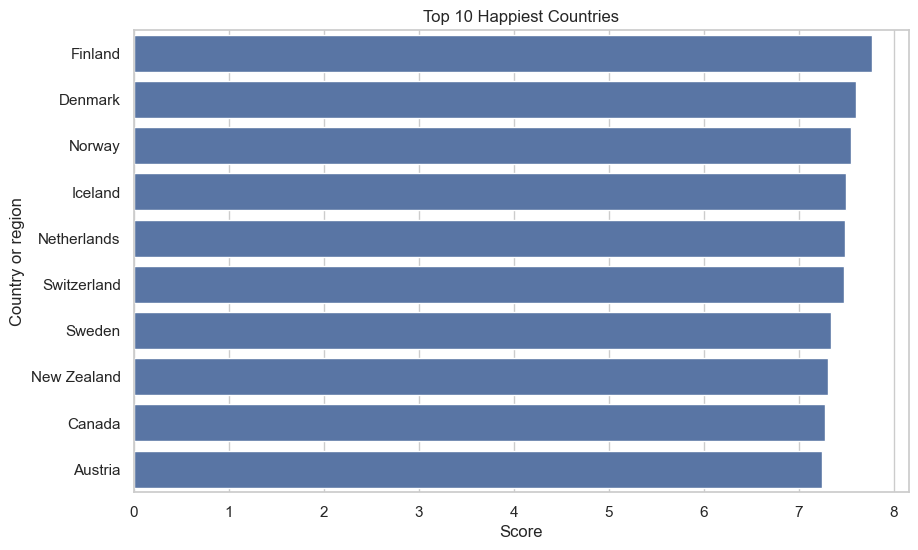

In [10]:
top10 = df.sort_values('Score', ascending=False).head(10)
sns.barplot(x='Score', y='Country or region', data=top10)
plt.title("Top 10 Happiest Countries")
plt.show()

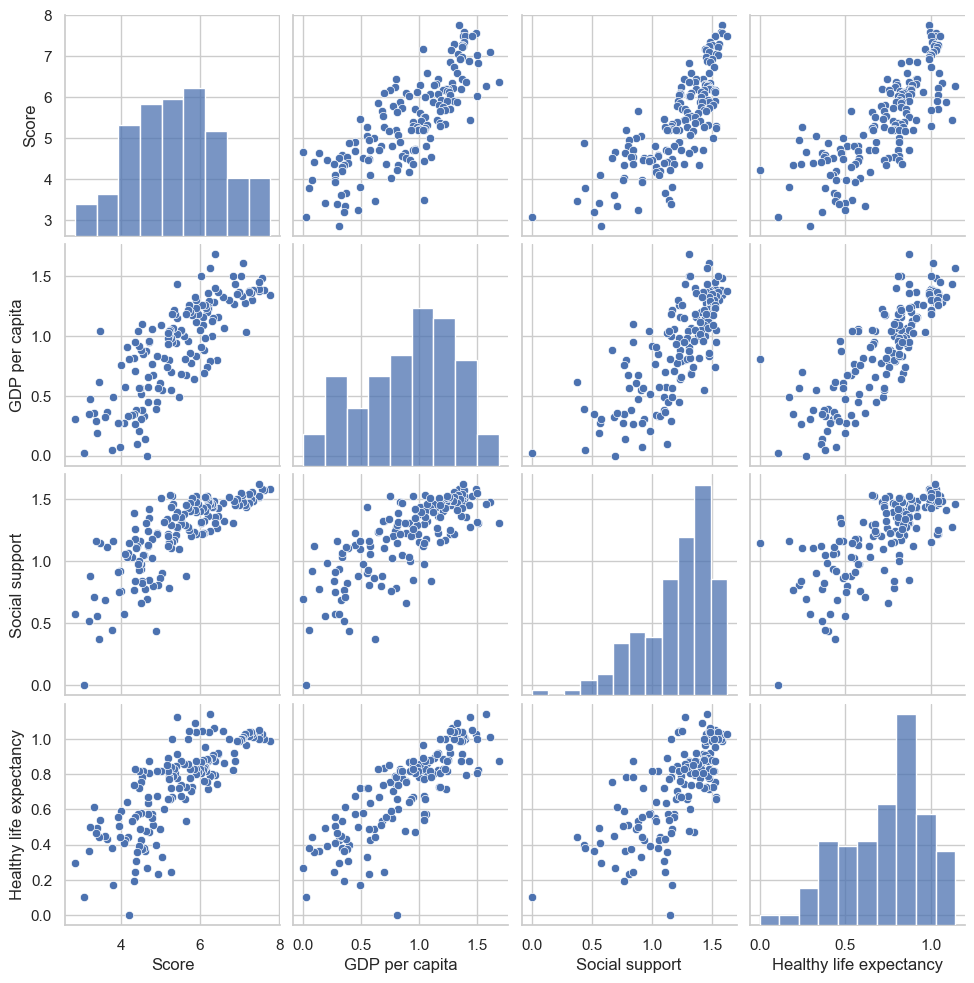

In [11]:
sns.pairplot(df[['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy']])

In [12]:
# Check again to be safe
df.isnull().sum()


Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [13]:
df = df.dropna()  # OR use df.fillna(value)

In [14]:
df_model = df.drop(['Country or region'], axis=1)

In [15]:
X = df_model.drop('Score', axis=1)

# y = Score
y = df_model['Score']

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [19]:
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [20]:
df_model

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
151,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [22]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", round(rmse, 4))
print("R² Score:", round(r2, 4))

Root Mean Squared Error (RMSE): 0.1545
R² Score: 0.9771


In [23]:
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
comparison_df.head(10)

,Actual,Predicted
0,5.011,4.979904
1,5.603,5.577908
2,5.285,5.350960
3,5.425,5.492076
4,4.587,4.543217
5,6.354,6.532354
6,5.082,5.138252
7,4.332,4.137742
8,5.175,5.099200
9,4.015,3.913711
